In [39]:
import h5py
import numpy as np
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, Activation, BatchNormalization
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [40]:
def loadAlzeimer(plane):
    if plane == 'coronal':
        print(plane)
        with h5py.File('data/Coronal-Augmented.h5', 'r') as hdf:
            G1 = hdf.get('Train Data')
            trainX = np.array(G1.get('x_train'))
            trainY = np.array(G1.get('y_train'))
            G2 = hdf.get('Test Data')
            testX = np.array(G2.get('x_test'))
            testY = np.array(G2.get('y_test'))

    elif plane == 'sagittal':
        print(plane)
        with h5py.File('data/Sagittal-Augmented.h5', 'r') as hdf:
            G1 = hdf.get('Train Data')
            trainX = np.array(G1.get('x_train'))
            trainY = np.array(G1.get('y_train'))
            G2 = hdf.get('Test Data')
            testX = np.array(G2.get('x_test'))
            testY = np.array(G2.get('y_test'))
    
    else:
        print(plane)
        with h5py.File('data/Axial-Augmented.h5', 'r') as hdf:
            G1 = hdf.get('Train Data')
            trainX = np.array(G1.get('x_train'))
            trainY = np.array(G1.get('y_train'))
            G2 = hdf.get('Test Data')
            testX = np.array(G2.get('x_test'))
            testY = np.array(G2.get('y_test'))
    
    return trainX, trainY, testX, testY

In [41]:
_, _, x_testC, y_testC = loadAlzeimer('coronal')
_, _, x_testA, y_testA = loadAlzeimer('axial')
_, _, x_testS, y_testS = loadAlzeimer('sagittal')

coronal
axial
sagittal


In [42]:
#extract first class labels out of binary classes 
def extract_binary_classes(X, Y, classes):
    label1 = classes[0]
    label2 = classes[1]

    idx1 = [np.where(Y == label1)[0]]
    idx1 = np.array(idx1)
    idx1 = idx1.T
    idx1 = np.squeeze(idx1)
    xtrain_class1 = X[idx1]
    ytrain_class1 = Y[idx1]
    # print('label 1 shape')
    # print(xtrain_class1.shape)
    # print(ytrain_class1.shape)

    idx2 = [np.where(Y == label2)[0]]
    idx2 = np.array(idx2)
    idx2 = idx2.T
    idx2 = np.squeeze(idx2)
    xtrain_class2 = X[idx2]
    ytrain_class2 = Y[idx2]

    # print('label 2 shape')
    # print(xtrain_class2.shape)
    # print(ytrain_class2.shape)
    X_new = np.concatenate((xtrain_class1, xtrain_class2), axis=0)
    Y_new = np.concatenate((ytrain_class1, ytrain_class2), axis=0)
    X_new,_,Y_new,_ = train_test_split(X_new, Y_new, test_size=0.001, random_state=42)
    # print('final shape')
    # print(X_new.shape)
    # print(Y_new.shape)
    
    return X_new, Y_new

In [43]:
#labels for binary classification: 0: AD, 1: EMCI, 2: LMCI, 3:NC
mapping = {
    0: 'AD',
    1: 'EMCI',
    2: 'LMCI',
    3: 'NC'
}

labels = [2, 0] ## must load the corresponding weights also. 


x_testC, y_testC = extract_binary_classes(x_testC,y_testC, labels)
x_testA, y_testA = extract_binary_classes(x_testA,y_testA, labels)
x_testS, y_testS = extract_binary_classes(x_testS,y_testS, labels)


In [44]:
#load weights for C A S
modelC = Sequential()
modelC.add(Conv2D(16, (3, 3), input_shape=(218,182,1), activation='relu'))
modelC.add(Conv2D(16, (3, 3), activation='relu'))
#model.add(Conv2D(16, (3, 3), activation='relu'))
modelC.add(MaxPooling2D(pool_size=(2, 2)))
modelC.add(Conv2D(32, (3, 3), activation='relu'))
modelC.add(Conv2D(32, (3, 3), activation='relu'))
modelC.add(Conv2D(32, (3, 3), activation='relu'))
modelC.add(MaxPooling2D(pool_size = (2, 2)))
modelC.add(Conv2D(64, (3, 3), activation='relu'))
modelC.add(Conv2D(16, (1,1)))
modelC.add(Flatten())
modelC.add(Dense(4, activation = 'softmax'))
modelC.compile(loss='categorical_crossentropy',optimizer='adam',metrics =['acc'])
modelC.load_weights('weights-binary/CNNScratch_coronal_LMCIvsAD.hdf5')

modelA = Sequential()
modelA.add(Conv2D(16, (3, 3), input_shape=(218,182,1), activation='relu'))
modelA.add(Conv2D(16, (3, 3), activation='relu'))
#model.add(Conv2D(16, (3, 3), activation='relu'))
modelA.add(MaxPooling2D(pool_size=(2, 2)))
modelA.add(Conv2D(32, (3, 3), activation='relu'))
modelA.add(Conv2D(32, (3, 3), activation='relu'))
modelA.add(Conv2D(32, (3, 3), activation='relu'))
modelA.add(MaxPooling2D(pool_size = (2, 2)))
modelA.add(Conv2D(64, (3, 3), activation='relu'))
modelA.add(Conv2D(16, (1,1)))
modelA.add(Flatten())
modelA.add(Dense(4, activation = 'softmax'))
modelA.compile(loss='categorical_crossentropy',optimizer='adam',metrics =['acc'])
modelA.load_weights('weights-binary/CNNScratch_axial_LMCIvsAD.hdf5')

modelS = Sequential()
modelS.add(Conv2D(16, (3, 3), input_shape=(218,182,1), activation='relu'))
modelS.add(Conv2D(16, (3, 3), activation='relu'))
#model.add(Conv2D(16, (3, 3), activation='relu'))
modelS.add(MaxPooling2D(pool_size=(2, 2)))
modelS.add(Conv2D(32, (3, 3), activation='relu'))
modelS.add(Conv2D(32, (3, 3), activation='relu'))
modelS.add(Conv2D(32, (3, 3), activation='relu'))
modelS.add(MaxPooling2D(pool_size = (2, 2)))
modelS.add(Conv2D(64, (3, 3), activation='relu'))
modelS.add(Conv2D(16, (1,1)))
modelS.add(Flatten())
modelS.add(Dense(4, activation = 'softmax'))
modelS.compile(loss='categorical_crossentropy',optimizer='adam',metrics =['acc'])
modelS.load_weights('weights-binary/CNNScratch_sagittal_LMCIvsAD.hdf5')

In [45]:
xtestCs = []
xtestAs = []
xtestSs = []
np.random.seed(103)

##############################################
# GENERATE RANDOM PATTERNS OF ONLY TWO LABELS #
##############################################

mapping = {
    0: 'AD',
    1: 'EMCI',
    2: 'LMCI',
    3: 'NC'
}

values = labels

# Generate a random pattern of size 4000
labels = np.random.choice(values, size=4000)


#numClasses = len(np.unique(labels))
numClasses = 4
idxC = [np.where(y_testC == i)[0] for i in range(0, numClasses)]
idxA = [np.where(y_testA == i)[0] for i in range(0, numClasses)]
idxS = [np.where(y_testS == i)[0] for i in range(0, numClasses)]

for i in range(len(labels)):
   #print(i)
   index = labels[i] #for every label in the test labels. 
   imgIndex = np.random.choice(idxC[index]) #generate image index belonging to Coronal plane for the same label. 
   #print('c index',imgIndex)
   xtestCs.append(x_testC[imgIndex]) #pick the image belonging to the same label from coronal plane. 

   imgIndex = np.random.choice(idxA[index]) #generate image index belonging to Axial plane for the same label. 
   #print('a index',imgIndex)
   xtestAs.append(x_testA[imgIndex]) #pick the image belonging to the same label from axial plane. 
   
   imgIndex = np.random.choice(idxS[index]) #generate image index belonging to Sagittal plane for the same label. 
   #print('s index',imgIndex)
   xtestSs.append(x_testS[imgIndex]) #pick the image belonging to the same label from sagital plane. 

#convert the lists to np arrays. 
xtestCs = np.array(xtestCs)
xtestAs = np.array(xtestAs)
xtestSs = np.array(xtestSs)
print(xtestCs.shape,xtestAs.shape,xtestSs.shape)


# #get the data ready for prediction using the loaded models <<Not needed for CNN Scratch>> 
# xtestCs = np.repeat(xtestCs, 3,axis=3)
# xtestAs = np.repeat(xtestAs, 3,axis=3)
# xtestSs = np.repeat(xtestSs, 3,axis=3)

#prediction using multiplanes [using the best weights]
print('coronal prediction')
predictionCoronal = modelC.predict(xtestCs)
print('axial prediction')
predictionAxial = modelA.predict(xtestAs)
print('sagittal prediction')
predictionSagittal = modelS.predict(xtestSs)

print(predictionCoronal.shape)
y_pred_coronal =np.argmax(predictionCoronal,axis=1)
y_pred_axial = np.argmax(predictionAxial,axis=1)
y_pred_sagittal = np.argmax(predictionSagittal,axis=1)

(4000, 218, 182, 1) (4000, 218, 182, 1) (4000, 218, 182, 1)
coronal prediction
axial prediction
sagittal prediction
(4000, 4)


===================================Ensemble=============================================
ensemble accuracy = 0.99325
================================== Coronal ==============================================
Coronal accuracy = 0.95
================================== axial ==============================================
Axial accuracy = 0.955
================================== Sagittal ==============================================
Sagittal accuracy = 0.947


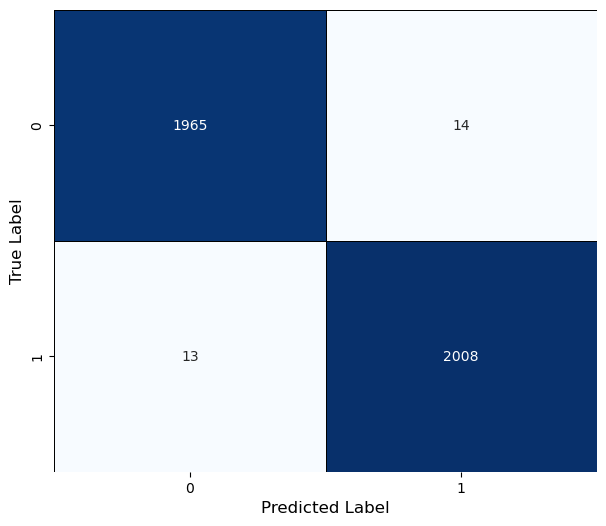

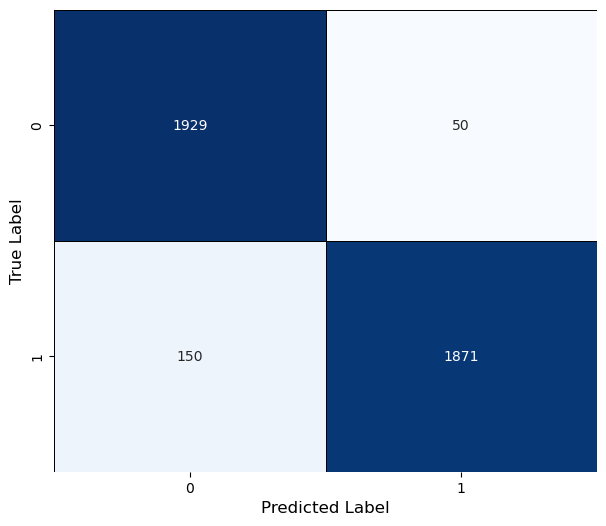

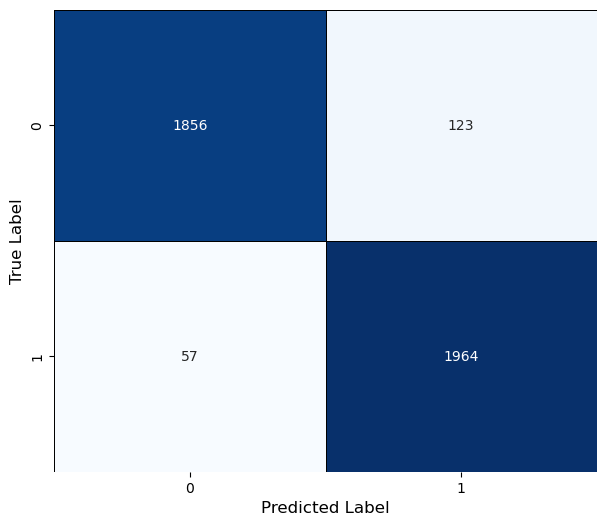

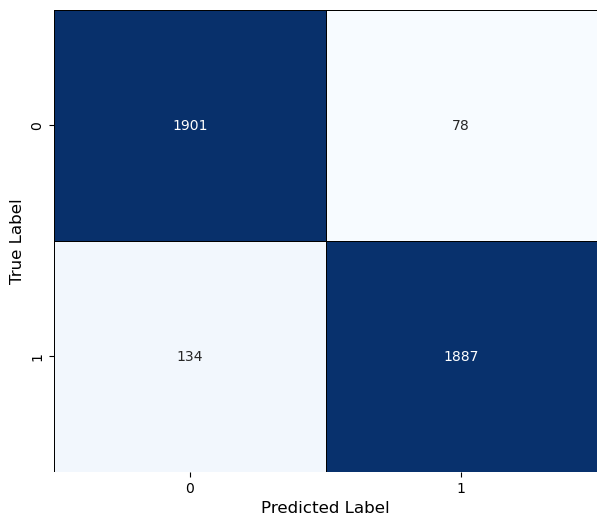

In [46]:
preds = np.stack([predictionCoronal,predictionAxial, predictionSagittal], axis=0)
summed = np.sum(preds, axis=0) #computes the sum of probability by all 3 models for each class
ensemble_prediction = np.argmax(summed, axis=1) 

#from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
print("===================================Ensemble=============================================")
cf_matrix = confusion_matrix(labels, ensemble_prediction)
fig = plt.figure(figsize=(7, 6))
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, linewidth=0.5,linecolor="black",fmt='')
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
plt.draw()
filepath = 'testing-cm-binary/CNNScratch_Ensemble_LMCIvsAD_4000.pdf'
plt.savefig(filepath)

tn, fp, fn, tp = confusion_matrix(labels, ensemble_prediction).ravel()
Sp_e = tn / (tn + fp)
Se_e = tp / (tp + fn)
FNR_e = 1-Sp_e
FPR_e = 1-Se_e
Ac_e = accuracy_score(labels, ensemble_prediction)
print('ensemble accuracy =', Ac_e)

print("================================== Coronal ==============================================")
cf_matrix = confusion_matrix(labels, y_pred_coronal)
fig = plt.figure(figsize=(7, 6))
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, linewidth=0.5,linecolor="black",fmt='')
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
plt.draw()
filepath = 'testing-cm-binary/CNNScratch_Coronal_LMCIvsAD_4000.pdf'
plt.savefig(filepath)

tn, fp, fn, tp = confusion_matrix(labels, y_pred_coronal).ravel()
Sp_c = tn / (tn + fp)
Se_c = tp / (tp + fn)
FNR_c = 1-Sp_c
FPR_c = 1-Se_c
Ac_c = accuracy_score(labels, y_pred_coronal)
print('Coronal accuracy =', Ac_c)

print("================================== axial ==============================================")
cf_matrix = confusion_matrix(labels, y_pred_axial)
fig = plt.figure(figsize=(7, 6))
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, linewidth=0.5,linecolor="black",fmt='')
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
plt.draw()
filepath = 'testing-cm-binary/CNNScratch_Axial_LMCIvsAD_4000.pdf'
plt.savefig(filepath)

tn, fp, fn, tp = confusion_matrix(labels, y_pred_axial).ravel()
Sp_a = tn / (tn + fp)
Se_a = tp / (tp + fn)
FNR_a = 1-Sp_a
FPR_a = 1-Se_a
Ac_a = accuracy_score(labels, y_pred_axial)
print('Axial accuracy =', Ac_a)
print("================================== Sagittal ==============================================")
cf_matrix = confusion_matrix(labels, y_pred_sagittal)
fig = plt.figure(figsize=(7, 6))
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False, linewidth=0.5,linecolor="black",fmt='')
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
plt.draw()
filepath = 'testing-cm-binary/CNNScratch_Sagittal_LMCIvsAD_4000.pdf'
plt.savefig(filepath)

tn, fp, fn, tp = confusion_matrix(labels, y_pred_sagittal).ravel()
Sp_s = tn / (tn + fp)
Se_s = tp / (tp + fn)
FNR_s = 1-Sp_s
FPR_s = 1-Se_s
Ac_s = accuracy_score(labels, y_pred_sagittal)
print('Sagittal accuracy =', Ac_s)

metrics = {'Accuracy':[Ac_c,Ac_a,Ac_s, Ac_e],
           'Specificity':[Sp_c,Sp_a,Sp_s,Sp_e],
           'Sensitivity':[Se_c,Se_a,Se_s,Se_e],
           'FNR':[FNR_c, FNR_a, FNR_s, FNR_e],
           'FPR':[FPR_c, FPR_a, FPR_s, FPR_e]
           }

df = pd.DataFrame(metrics)
df.index = ['coronal', 'axial', 'sagittal', 'ensemble']
# #print (df)
df.to_csv('testing-metrics-binary//' + 'CNN_LMCIvsAD_4000.csv')